# Caso Grupal: Detección de Anomalías y técnicas de agrupamiento


Nombres:

1- Joel Elí Orellana Martínez

2- Swith Merchan Diaz

3- Jairo José Barrera

## Objetivos

Mediante este trabajo se pretende que ponga en práctica la aplicación de los algoritmos de detección de anomalías u outliers y las técnicas de agrupamiento. El objetivo es detectar anomalías, generar y analizar agrupaciones aplicando algoritmos de aprendizaje máquina, con el fin de elegir el mejor método para el conjunto de datos dado. Debe detallar los pasos que hay que realizar para detección automática de valores inusuales y, por otro lado, analizar los clúster o grupos resultado de aplicar un algoritmo de agrupamiento.


## Tareas a realizar
•	Análisis descriptivo de los datos:

•	De las variables numéricas, hallar datos estadísticos.}

•	De las variables categóricas, listar las diferentes categorías y hallar la frecuencia de cada una de ellas.

•	Crear matriz de correlaciones existentes entre las variables numéricas del conjunto de datos, analizar los resultados. 

•	Tratamiento de missing. Si existen valores faltantes, decidir si eliminar los registros, llenarlos con valores como la media, la mediana o la moda y justifique su respuesta.

•	Aplicar una técnica de detección de anomalías y explicar los resultados obtenidos.

•	Aplicar una técnica de agrupamiento, explicar la técnica y los resultados obtenidos.

•	Comentar las ventajas y desventajas de cada modelo. 

# EDA: Análisis Exploratorio de Datos

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Importando las librerías básicas para el análisis exploratorio de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Obteniendo el csv
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TAREA3_AA/CTG.csv')
df.head()

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,Variab10.txt,12/1/1996,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
1,Fmcs_1.txt,5/3/1996,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
2,Fmcs_1.txt,5/3/1996,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,5/3/1996,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,5/3/1996,CTG0005.txt,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


In [9]:
# Obteniendo el nombre de las columnas
df.columns

Index(['FileName', 'Date', 'SegFile', 'b', 'e', 'LBE', 'LB', 'AC', 'FM', 'UC',
       'ASTV', 'MSTV', 'ALTV', 'MLTV', 'DL', 'DS', 'DP', 'DR', 'Width', 'Min',
       'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance',
       'Tendency', 'A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP',
       'CLASS', 'NSP'],
      dtype='object')

In [10]:
# verificando si existen valores nulos
df.isna().sum()

FileName    3
Date        3
SegFile     3
b           3
e           3
LBE         3
LB          3
AC          3
FM          2
UC          2
ASTV        2
MSTV        2
ALTV        2
MLTV        2
DL          1
DS          1
DP          1
DR          1
Width       3
Min         3
Max         3
Nmax        3
Nzeros      3
Mode        3
Mean        3
Median      3
Variance    3
Tendency    3
A           3
B           3
C           3
D           3
E           3
AD          3
DE          3
LD          3
FS          3
SUSP        3
CLASS       3
NSP         3
dtype: int64

In [11]:
# al ser pocos, no representan un porcentaje significativo del total de datos, procedemos a
# eliminar las filas que los contienen
df.dropna(inplace=True)

In [12]:
# Creando una función que nos ayude a verificar si una columna tiene el mismo valor, y así eliminarla
def unique_cols(df):
    a = df.to_numpy()
    return (a[0] == a).all(0)
# identificando sí hay una columna de valores repetidos
repeated_cols =  unique_cols(df)
repeated_cols

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [13]:
# identificando la columna de valor repetido
cols = df.columns[repeated_cols]
cols

Index(['DR'], dtype='object')

In [14]:
# eliminando la columna
df = df.drop(cols, axis= 1)
df.head()

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,Variab10.txt,12/1/1996,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
1,Fmcs_1.txt,5/3/1996,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
2,Fmcs_1.txt,5/3/1996,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,5/3/1996,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,5/3/1996,CTG0005.txt,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


In [15]:
# LEYENDO LAS DESCRIPCIONES DEL DATASET
with open('/content/drive/MyDrive/Colab Notebooks/TAREA3_AA/names.txt') as f:
    while True:
        line = f.readline()
        if not line:
            break
        print(line.strip())

FileName: of CTG examination

Date: of the examination

b: start instant

e: end instant

LBE: baseline value (medical expert)

LB: baseline value (SisPorto)

AC: accelerations (SisPorto)

FM: foetal movement (SisPorto)

UC: uterine contractions (SisPorto)

ASTV: percentage of time with abnormal short term variability (SisPorto)

mSTV: mean value of short term variability (SisPorto)

ALTV: percentage of time with abnormal long term variability (SisPorto)

mLTV: mean value of long term variability (SisPorto)

DL: light decelerations

DS: severe decelerations

DP: prolongued decelerations

DR: repetitive decelerations

Width: histogram width

Min: low freq. of the histogram

Max: high freq. of the histogram

Nmax: number of histogram peaks

Nzeros: number of histogram zeros

Mode: histogram mode

Mean: histogram mean

Median: histogram median

Variance: histogram variance

Tendency: histogram tendency: -1=left assymetric; 0=symmetric; 1=right assymetric

A: calm sleep

B: REM sleep

C: c

También se encuentra una descripción más detallada del dataset en el repositorio de ML de la UCI: https://archive.ics.uci.edu/ml/datasets/cardiotocography#

De la página anterior, encontramos más información de las variables:

### **Exam data**		
**FileName**	of CTG examination				
**Date**	of the examination				
**b**	start instant				
**e**	end instant				
### **Measurements**
**LBE**	baseline value (medical expert)				
**LB**	baseline value (SisPorto)				
**AC**	accelerations (SisPorto)				
**FM**	foetal movement (SisPorto)				
**UC**	uterine contractions (SisPorto)				
**ASTV**	percentage of time with abnormal short term variability  (SisPorto)				
**mSTV**	mean value of short term variability  (SisPorto)				
**ALTV**	percentage of time with abnormal long term variability  (SisPorto)				
**mLTV**	mean value of long term variability  (SisPorto)				
**DL**	light decelerations				
**DS**	severe decelerations				
**DP**	prolongued decelerations				
**DR**	repetitive decelerations				
**Width**	histogram width				
**Min**	low freq. of the histogram				
**Max**	high freq. of the histogram				
**Nmax**	number of histogram peaks				
**Nzeros**	number of histogram zeros				
**Mode**	histogram mode				
**Mean**	histogram mean				
**Median**	histogram median				
**Variance**	histogram variance				
**Tendency**	histogram tendency: -1=left assymetric; 0=symmetric; 1=right assymetric				
### **Classification**
**A**	calm sleep				
**B**	REM sleep				
**C**	calm vigilance				
**D**	active vigilance				
**SH**	shift pattern (A or Susp with shifts)				
**AD**	accelerative/decelerative pattern (stress situation)				
**DE**	decelerative pattern (vagal stimulation)				
**LD**	largely decelerative pattern				
**FS**	flat-sinusoidal pattern (pathological state)				
**SUSP**	suspect pattern				
**CLASS**	Class code (1 to 10) for classes A to SUSP				
**NSP**	Normal=1; Suspect=2; Pathologic=3

In [16]:
# Vamos a eliminar las columnas de los datos del examen (Exam data)
# Tambien las columnas de clasificación
# Vamos a guardar dos clasificaciones la variable CLASS ( para clasificar datos hasta en 10 tipos)
# y la variable NSP (que calsifica hasta en 3 tipos)
CLASS = df[['CLASS']]
NSP = df[['NSP']]
drop_columns = ['FileName', 'Date', 'SegFile', 'b', 'e', 'A', 'B', 'C', 'D', 'AD', 'DE', 'LD', 'FS', 'SUSP', 'CLASS', 'NSP']
df = df.drop(drop_columns, axis=1)

In [17]:
# observando el dataframe
df.head()

,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,E
0,120.0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,0.0
1,132.0,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,0.0
2,133.0,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,0.0
3,134.0,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,0.0
4,132.0,132.0,4.0,0.0,5.0,16.0,2.4,0.0,19.9,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,0.0


In [18]:
CLASS.head() # una variable que clasifica en hasta 10 tipos de datos

,CLASS
0,9.0
1,6.0
2,6.0
3,6.0
4,2.0


In [19]:
NSP.head() # otra variable que clasifica en Normal=1; Suspect=2; Pathologic=3

,NSP
0,2.0
1,1.0
2,1.0
3,1.0
4,1.0


In [20]:
# En el caso de las variables LB y LBE, ambas miden lo mismo (Baseline value), sin embargo, una es por expertos medicos y la otra
# es la implementación del paper de Oporto
# revisemos la correlacion entre ambas variables
df.corr()['LBE']['LB']

1.0

In [21]:
# Ahora eliminaremos las variables de tendencia central del dataset, a nuestra consideración, es conveniente dejar una variable de todas,
# dejaremos la variable "width" del histograma
# Y también eliminaremos "LB"
drop_columns = ['Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance', 'Tendency', 'LB']
df = df.drop(drop_columns, axis=1)

In [22]:
# El dataset queda de la siguiente manera
df.head()

,LBE,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,Width,E
0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,0.0,0.0,64.0,0.0
1,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,0.0,0.0,130.0,0.0
2,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,0.0,0.0,130.0,0.0
3,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,0.0,0.0,117.0,0.0
4,132.0,4.0,0.0,5.0,16.0,2.4,0.0,19.9,0.0,0.0,0.0,117.0,0.0


In [23]:
# La variable "E" no aparece en ninguna de las descripciones del dataset
# hagamos una inspección de sus valores
df.E.value_counts()

0.0    2054
1.0      72
Name: E, dtype: int64

In [24]:
# "E" parece ser una variable de clasificación, por lo que vamos a eliminarla
df = df.drop('E', axis=1)

In [25]:
# El dataset final queda así:
df.head()

,LBE,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,Width
0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,0.0,0.0,64.0
1,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,0.0,0.0,130.0
2,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,0.0,0.0,130.0
3,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,0.0,0.0,117.0
4,132.0,4.0,0.0,5.0,16.0,2.4,0.0,19.9,0.0,0.0,0.0,117.0


In [26]:
# hagamos exploración de las variables que quedan
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2126 entries, 0 to 2125
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LBE     2126 non-null   float64
 1   AC      2126 non-null   float64
 2   FM      2126 non-null   float64
 3   UC      2126 non-null   float64
 4   ASTV    2126 non-null   float64
 5   MSTV    2126 non-null   float64
 6   ALTV    2126 non-null   float64
 7   MLTV    2126 non-null   float64
 8   DL      2126 non-null   float64
 9   DS      2126 non-null   float64
 10  DP      2126 non-null   float64
 11  Width   2126 non-null   float64
dtypes: float64(12)
memory usage: 215.9 KB


In [27]:
# principales medidas de tendencia central
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LBE,2126.0,133.303857,9.840844,106.0,126.0,133.0,140.0,160.0
AC,2126.0,2.722484,3.560850,0.0,0.0,1.0,4.0,26.0
FM,2126.0,7.241298,37.125309,0.0,0.0,0.0,2.0,564.0
UC,2126.0,3.659925,2.847094,0.0,1.0,3.0,5.0,23.0
ASTV,2126.0,46.990122,17.192814,12.0,32.0,49.0,61.0,87.0
MSTV,2126.0,1.332785,0.883241,0.2,0.7,1.2,1.7,7.0
ALTV,2126.0,9.846660,18.396880,0.0,0.0,0.0,11.0,91.0
MLTV,2126.0,8.187629,5.628247,0.0,4.6,7.4,10.8,50.7
DL,2126.0,1.570085,2.499229,0.0,0.0,0.0,3.0,16.0
DS,2126.0,0.003293,0.057300,0.0,0.0,0.0,0.0,1.0


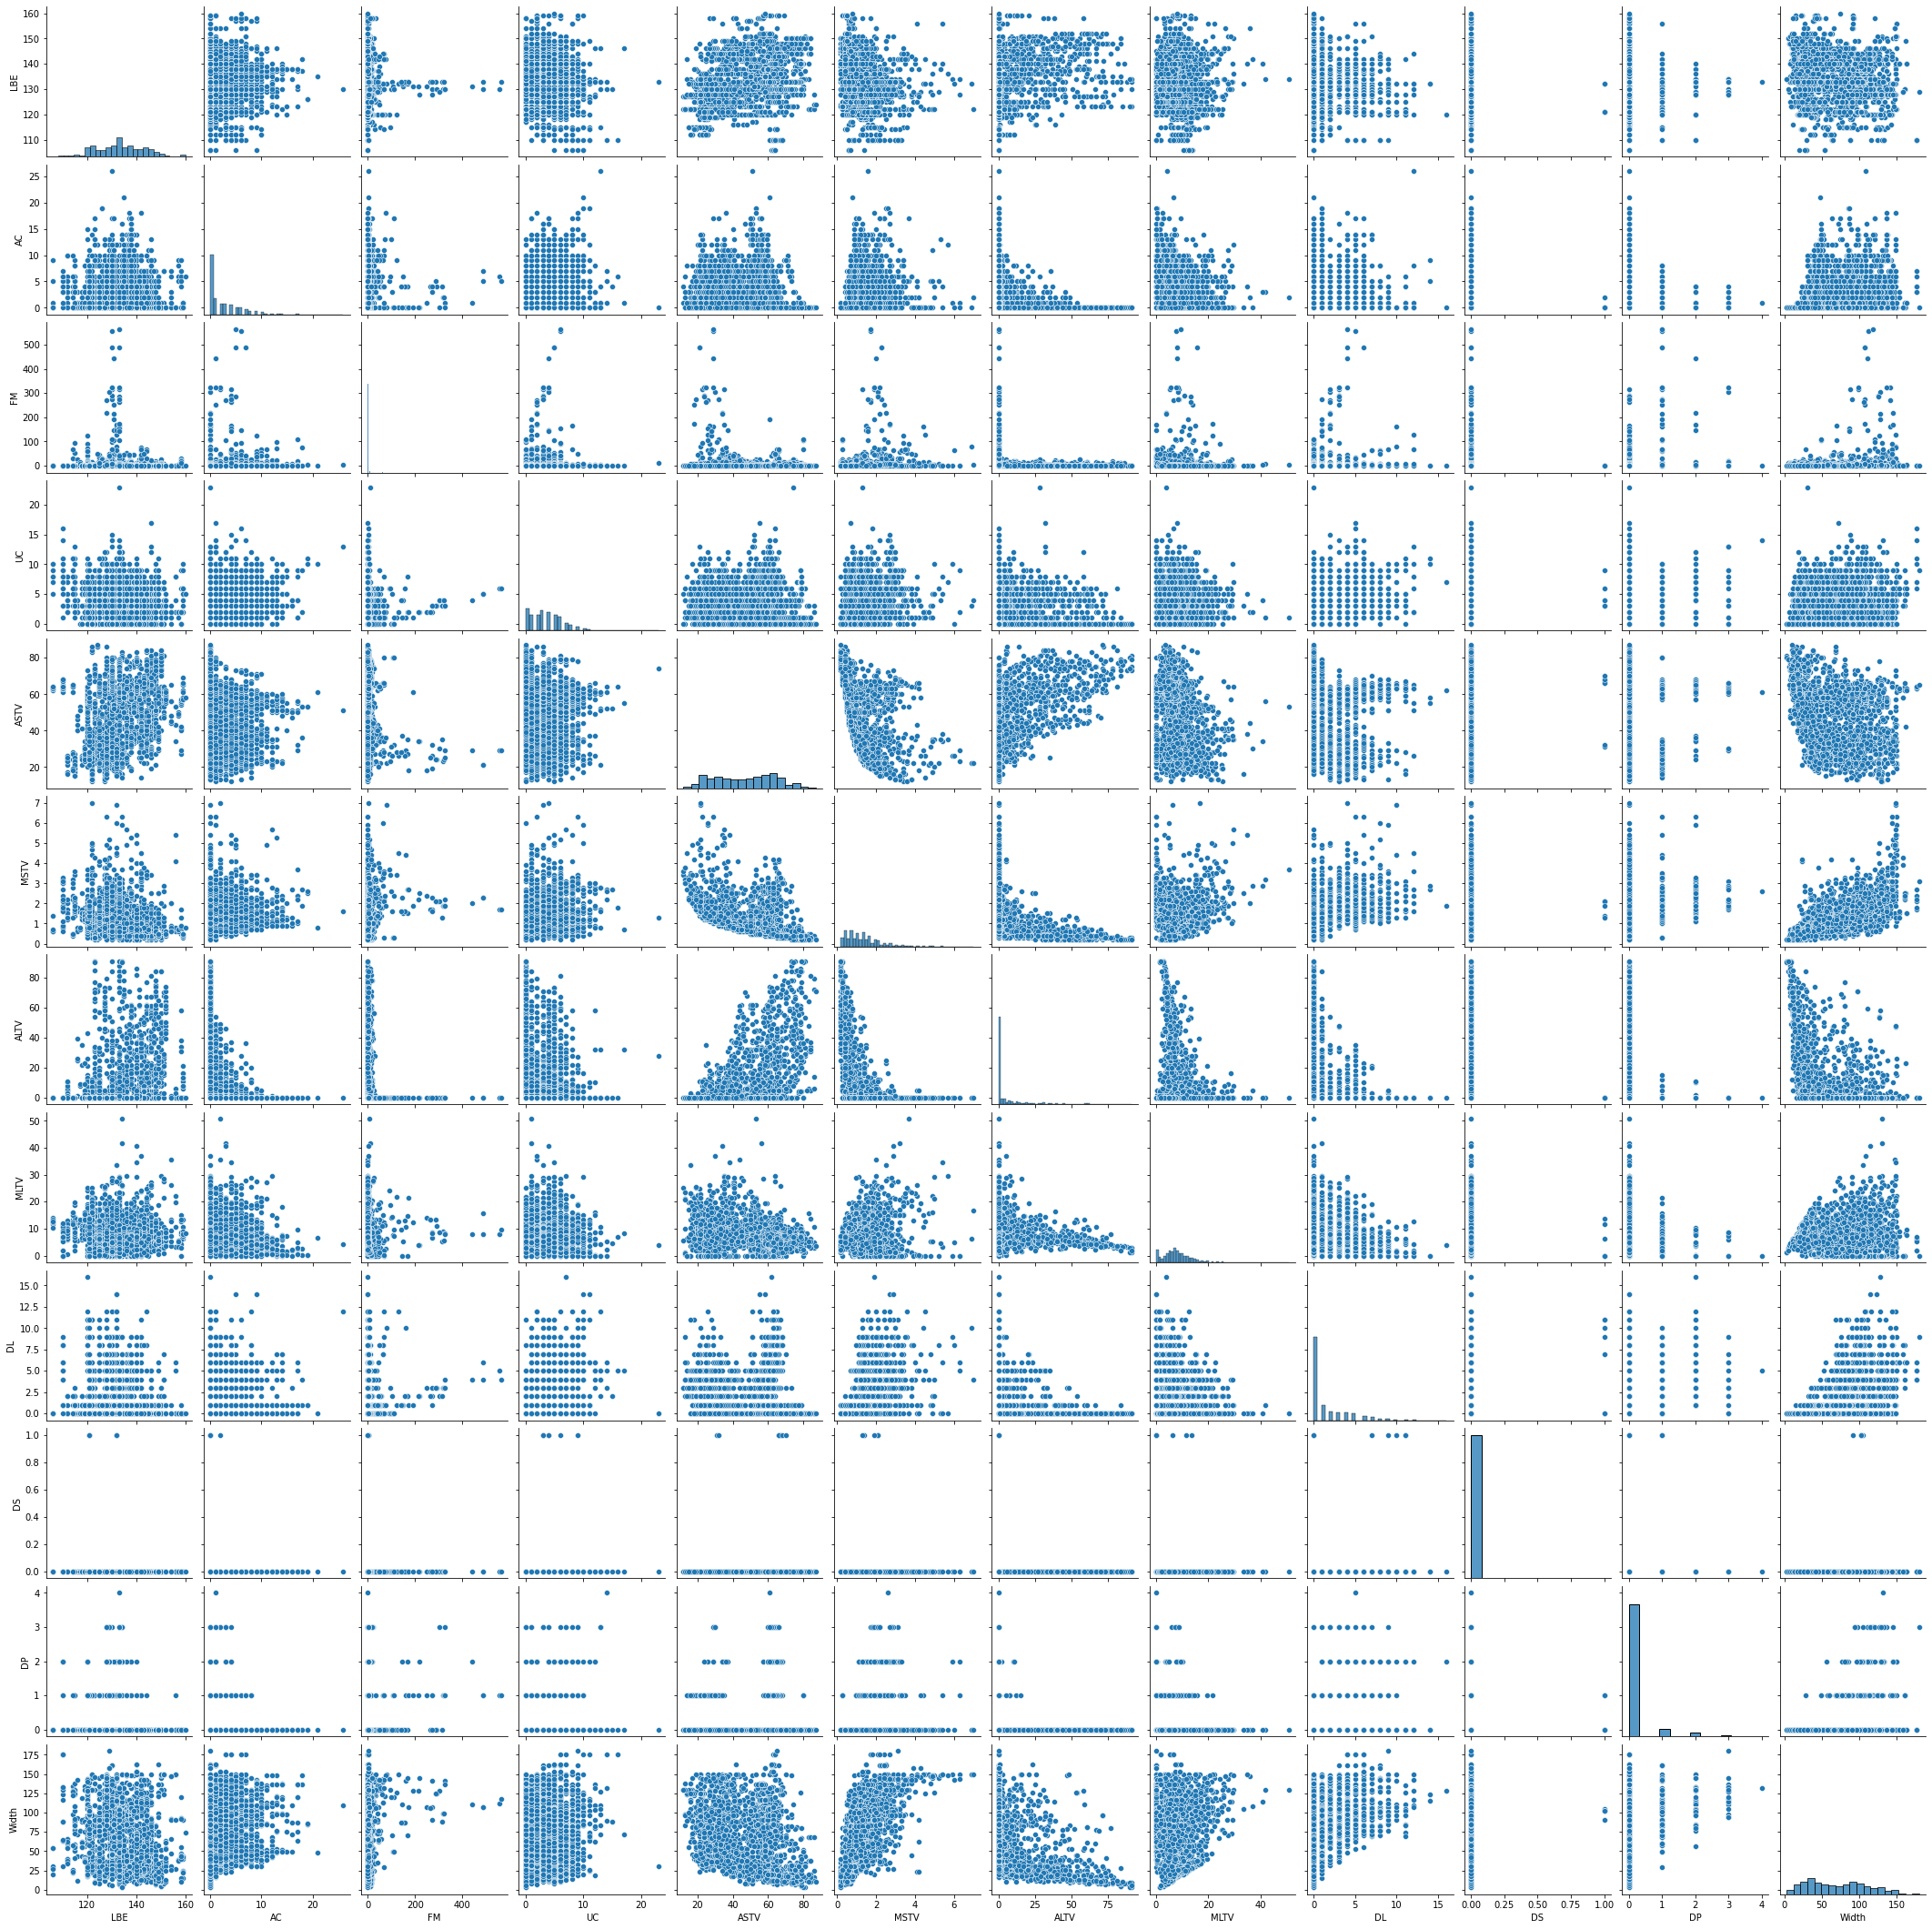

In [28]:
# hagamos un pairplot de las variables que quedan
sns.pairplot(df)

In [29]:
# estudiemos la correlación entre las variables que quedan
df.corr()

,LBE,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,Width
LBE,1.000000,-0.077967,-0.033305,-0.127722,0.305570,-0.279607,0.285630,-0.032091,-0.155908,-0.053518,-0.117133,-0.147679
AC,-0.077967,1.000000,0.053956,0.212100,-0.197985,0.191378,-0.345162,-0.128901,-0.011350,-0.039341,-0.110317,0.291516
FM,-0.033305,0.053956,1.000000,-0.036626,-0.116461,0.138061,-0.072214,0.021031,0.076283,-0.010328,0.205337,0.171448
UC,-0.127722,0.212100,-0.036626,1.000000,-0.079651,0.232687,-0.247513,-0.106590,0.339484,0.018405,0.152395,0.152990
ASTV,0.305570,-0.197985,-0.116461,-0.079651,1.000000,-0.430705,0.459413,-0.315105,-0.037040,0.033949,0.053677,-0.260463
MSTV,-0.279607,0.191378,0.138061,0.232687,-0.430705,1.000000,-0.470259,0.073892,0.516901,0.034130,0.287548,0.660847
ALTV,0.285630,-0.345162,-0.072214,-0.247513,0.459413,-0.470259,1.000000,-0.171114,-0.266298,-0.030770,-0.140133,-0.451297
MLTV,-0.032091,-0.128901,0.021031,-0.106590,-0.315105,0.073892,-0.171114,1.000000,-0.251442,-0.037667,-0.230849,0.110942
DL,-0.155908,-0.011350,0.076283,0.339484,-0.037040,0.516901,-0.266298,-0.251442,1.000000,0.121617,0.294068,0.520656
DS,-0.053518,-0.039341,-0.010328,0.018405,0.033949,0.034130,-0.030770,-0.037667,0.121617,1.000000,0.019766,0.044880


In [30]:
# existe alguna correlación con un valor absoluto mayor o igual a 0.9?
abs(df.corr()) >= 0.9

,LBE,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,Width
LBE,True,False,False,False,False,False,False,False,False,False,False,False
AC,False,True,False,False,False,False,False,False,False,False,False,False
FM,False,False,True,False,False,False,False,False,False,False,False,False
UC,False,False,False,True,False,False,False,False,False,False,False,False
ASTV,False,False,False,False,True,False,False,False,False,False,False,False
MSTV,False,False,False,False,False,True,False,False,False,False,False,False
ALTV,False,False,False,False,False,False,True,False,False,False,False,False
MLTV,False,False,False,False,False,False,False,True,False,False,False,False
DL,False,False,False,False,False,False,False,False,True,False,False,False
DS,False,False,False,False,False,False,False,False,False,True,False,False


In [31]:
# Excepto la correlación con la variable misma, todas las demás no son mayores a 0.9

# Creación de modelo de clustering con DBSCAN

In [32]:
# Escalando los datos a una misma medida
from sklearn.preprocessing import MinMaxScaler
# vamos a escalar todos los datos dado que no hay conjunto de entrenamiento y prueba
# En este caso se usará el MinMaxScaler para evitar la perdida de outliers u otra información util sobre las variables
# DBSCAN es un modelo de aprendizaje no supervisado
X = MinMaxScaler().fit_transform(df)

In [33]:
# Importando modelo
from sklearn.cluster import DBSCAN

In [34]:
# creando un modelo de valores por defecto (eps=0.5 segun la documentacion de sklearn)
model = DBSCAN()

In [35]:
# Entrenando y prediciendo los clusters con DBSCAN
model.fit_predict(X)

array([0, 0, 0, ..., 0, 0, 0])

In [36]:
# analizando los clusters que ha encontrado y la cantidad de elementos que pertenecen a ese cluster
np.unique(model.labels_, return_counts=True)

(array([-1,  0,  1]), array([   6, 2115,    5]))

In [37]:
# El modelo ha encontrado 2 clusters o agrupamientos con los valores por defecto de eps
# -1 es el valor de los clusters para detectar outliers
# veamos si podemos generar un mejor modelo analizando el porcentaje de outliers
outlier_percent = []
number_of_outliers = []
# creando modelos con eps entre 0.1 y el eps por defecto de 0.5
for eps in np.linspace(0.1,0.5,100):
    
    # Modelo
    dbscan = DBSCAN(eps=eps)
    dbscan.fit(X)
    
    # Encontrando el numero de outliers
    number_of_outliers.append(np.sum(dbscan.labels_ == -1))
    
    # Porcentaje de outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)

Text(0.5, 0, 'Epsilon Value')

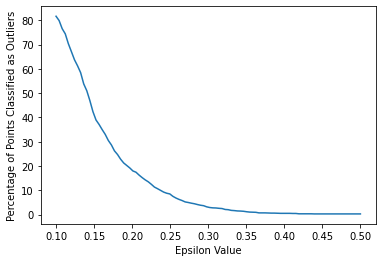

In [38]:
# creando un lineplot para visualizar el % de outliers
sns.lineplot(x=np.linspace(0.1,0.5,100),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")

In [39]:
# En 0.4 vemos que el % de outliers ha disminuido sustancialmente
# creando un modelo con eps=0.4
model = DBSCAN(eps=0.4)

In [40]:
# entrenando el nuevo modelo
model.fit_predict(X)

array([0, 0, 0, ..., 0, 0, 0])

In [41]:
# veamos el numero de clusters y la cantidad de elementos de cada una
# en total salen 11 outliers y 3 clusters
np.unique(model.labels_, return_counts=True)

(array([-1,  0,  1,  2]), array([  11, 2104,    6,    5]))

# Detección de Outliers

In [42]:
# Para este caso usaremos Local Outlier Factor
# Vamos a preprocesar los datos con QuantileTransformer
# es una mejor opción para datos que sabemos que no siguen una distribución normal
from sklearn.preprocessing import QuantileTransformer
# Usamos QuantileTransformer que es un escalador que no elimina los outliers

In [43]:
qt = QuantileTransformer()
X = qt.fit_transform(df)

Usaremos la librería de Python PyOD.

PyOD es la librería más comprendible para la detección de outliers en datos multivariables (como los del dataset).

Más información se encuentra disponible en: https://pyod.readthedocs.io/en/latest/


In [ ]:
!pip install pyod

In [48]:
from pyod.models.lof import LOF # version de Local Outlier Factor de PyOD
# una estimacion del numero de vecinos indica que si queremos menos del 10% de contaminacion
# debemos usar 20 vecinos
# tomado de DataCamp: https://campus.datacamp.com/courses/anomaly-detection-in-python/distance-and-density-based-algorithms?ex=14
# la metrica de manhattan trabaja muy bien con datos de altas dimensiones
# también puede ser utilizado para variables categóricas
lof = LOF(n_neighbors=20, metric='manhattan')

In [49]:
lof.fit(X) # entrenamos el modelo

LOF(algorithm='auto', contamination=0.1, leaf_size=30, metric='manhattan',
  metric_params=None, n_jobs=1, n_neighbors=20, novelty=True, p=2)

In [50]:
lof.labels_

array([1, 0, 0, ..., 0, 1, 1])

In [51]:
# aislando los outliers
probs = lof.predict_proba(X)

In [57]:
# encontrando los outliers si su probabilidad es mayor de 0.55
is_outlier = probs[:, 1] > 0.55
outliers = df[is_outlier]

In [58]:
outliers # este es el resultado de los outliers obtenidos

,LBE,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,Width
702,131.0,0.0,107.0,0.0,80.0,0.3,0.0,7.6,0.0,0.0,1.0,49.0
703,130.0,0.0,110.0,0.0,80.0,0.3,0.0,7.4,0.0,0.0,1.0,49.0
704,130.0,0.0,66.0,0.0,80.0,0.3,0.0,0.0,0.0,0.0,1.0,29.0
1489,132.0,0.0,0.0,6.0,32.0,1.3,0.0,13.6,0.0,1.0,1.0,91.0


# Resultados:

1. Se han eliminado las variables que no representan ningún aporte a los modelos de clasificación. Esto está sujeto a las formas de pensar de los científicos de datos por lo que dependiendo de los criterios usados, otros pueden haber quitado más variables o eliminado menos. Nosotros consideramos dejar las variables que podrían representar una mayor cantidad de información y representatividad.

2. El modelo de clustering con DBSCAN ha clasificado en tres clusters con outliers, sin embargo, la gran mayoría de datos han quedado dentro de un solo cluster. Creemos que el tipo de escalado puede tener mucha relación con esto, es probable que se necesite también utilizar PCA (Análisis de Componentes) para mejorar los resultados y reducir features. 

3. LocalOutlierFactor permite aislar los outliers, en particular, la implementación usando PyOD es fácil de usar y nos muestra 4 datos con outliers.